In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
train_set = pd.read_csv('Training_data_set.csv')

In [3]:
train_set.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
train_set.tail()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4,5,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5,5,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4,5,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,None,None,diesel,874352.25
53514,78515,bmw,x5,Kochi,142000.0,First,2008,11,2993,173.0,NaN,4,auto,5,5,diesel,1576610.25


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [6]:
train_set.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [7]:
#check rows and columns
train_set.shape

(53515, 17)

In [8]:
#unique values of Categorical Features
print(train_set['Location'].nunique())
print(train_set['fuel_type'].nunique())
print(train_set['transmission'].nunique())
print(train_set['Owner Type'].nunique())

11
2
2
4


In [9]:
train_set['Price'].describe()

count    5.351500e+04
mean     1.098084e+06
std      8.441565e+05
min      3.000000e+00
25%      5.051812e+05
50%      8.854552e+05
75%      1.477829e+06
max      2.212078e+07
Name: Price, dtype: float64

In [10]:
train_set['Price'].max()

22120775.25

In [11]:
train_set['fuel_type'].describe()

count      53515
unique         2
top       diesel
freq       27559
Name: fuel_type, dtype: object

In [12]:
#checking for null values

train_set.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [13]:
# imputing null values

In [14]:
train_set['Distance '] = train_set['Distance '].replace(np.nan, train_set['Distance '].median())

In [15]:
train_set['Owner Type'].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

In [16]:
var = 'fuel_type'
train_set[var].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [17]:
train_set['Distance '].values

array([  65520.,   27750.,   46000., ...,   25500., 1195500.,  142000.])

In [18]:
var = 'transmission'
train_set[var].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

In [19]:
var = 'Location'
train_set[var].value_counts()

Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

In [20]:
var = 'Maker'
train_set[var].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [21]:
var = 'body_type'
train_set[var].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [22]:
var = 'Owner Type'
train_set[var].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

In [23]:
train_set['engine_power'] = train_set['engine_power'].replace(np.nan, train_set['engine_power'].median())
train_set['body_type'] = train_set['body_type'].replace(np.nan,'compact')
train_set['door_count'] = train_set['door_count'].replace('None',4)
train_set['seat_count'] = train_set['seat_count'].replace('None',5)

In [24]:
train_set.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


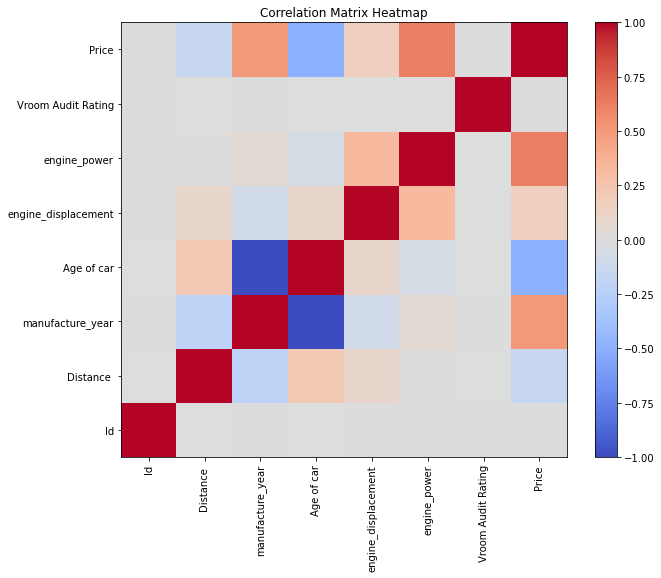

In [25]:
# Compute the correlation matrix
corr_matrix = train_set.corr()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using matplotlib's pcolor function
heatmap = ax.pcolor(corr_matrix, cmap='coolwarm')

# Add a color bar to the right of the heatmap
cbar = plt.colorbar(heatmap)

# Set the tick marks and labels for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns))+0.5, minor=False)
ax.set_yticks(np.arange(len(corr_matrix.index))+0.5, minor=False)
ax.set_xticklabels(corr_matrix.columns, minor=False, rotation=90)
ax.set_yticklabels(corr_matrix.index, minor=False)

# Add a title to the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_17968/2398509473.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


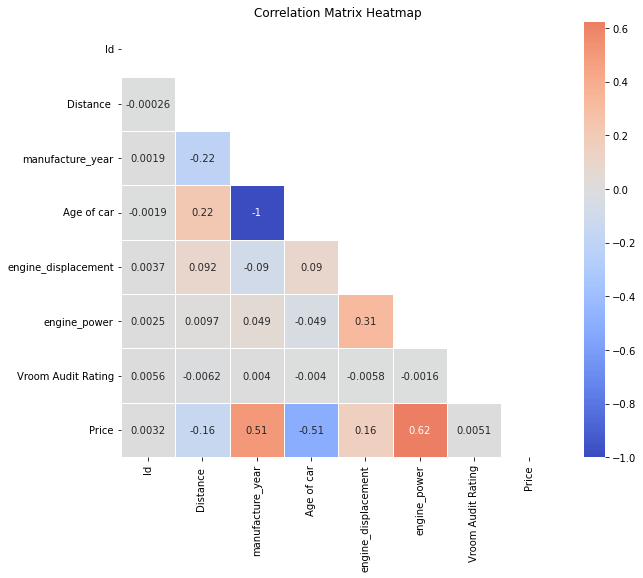

In [26]:
# Compute the correlation matrix
corr_matrix = train_set.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using seaborn's heatmap function
heatmap = sns.heatmap(corr_matrix, mask=mask, center=0, square=True, linewidths=.5, cmap='coolwarm', annot=True)

# Set the tick marks and labels for the x and y axes
ax.set_xticklabels(corr_matrix.columns, fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

# Add a title to the plot
ax.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

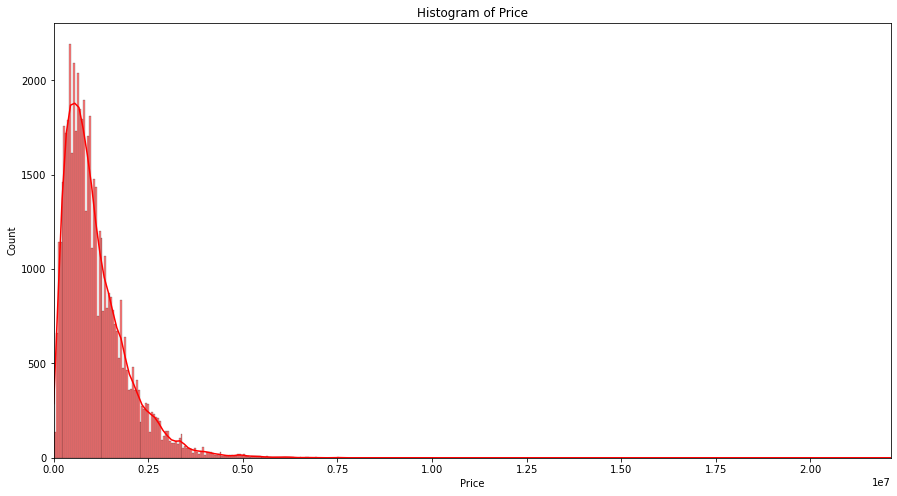

In [27]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 8))

# Create the histogram using seaborn's distplot function
sns.histplot(train_set['Price'], ax=ax, color='red', kde=True)

# Set the x-axis limit
ax.set_xlim([0, 22120775.25])

# Add a title to the plot
ax.set_title('Histogram of Price')

# Show the plot
plt.show()

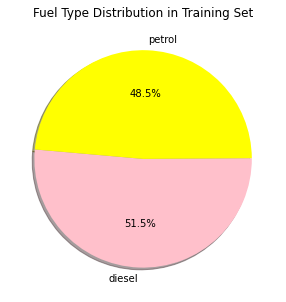

In [28]:
# Group the data by fuel type and count the number of cars in each group
fuel_counts = train_set.groupby('fuel_type').size()

# Define colors for each fuel type
colors = ['pink', 'yellow']

# Create the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(fuel_counts, labels=fuel_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=175)
ax.set_title('Fuel Type Distribution in Training Set')

# Show the chart
plt.show()

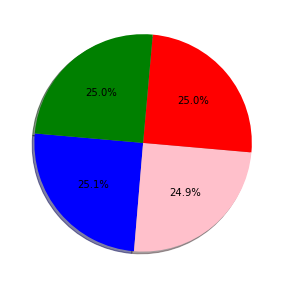

In [29]:
# Group the data by "Owner Type" and count the occurrences of "Price"
grouped = train_set.groupby("Owner Type")["Price"].count()

# Define the colors for each slice
colors = ["blue", "pink", "red", "green"]

# Create a pie chart with the grouped data, using the defined colors
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(grouped, colors=colors, autopct="%1.1f%%", shadow=True, startangle=175)

# Display the chart
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


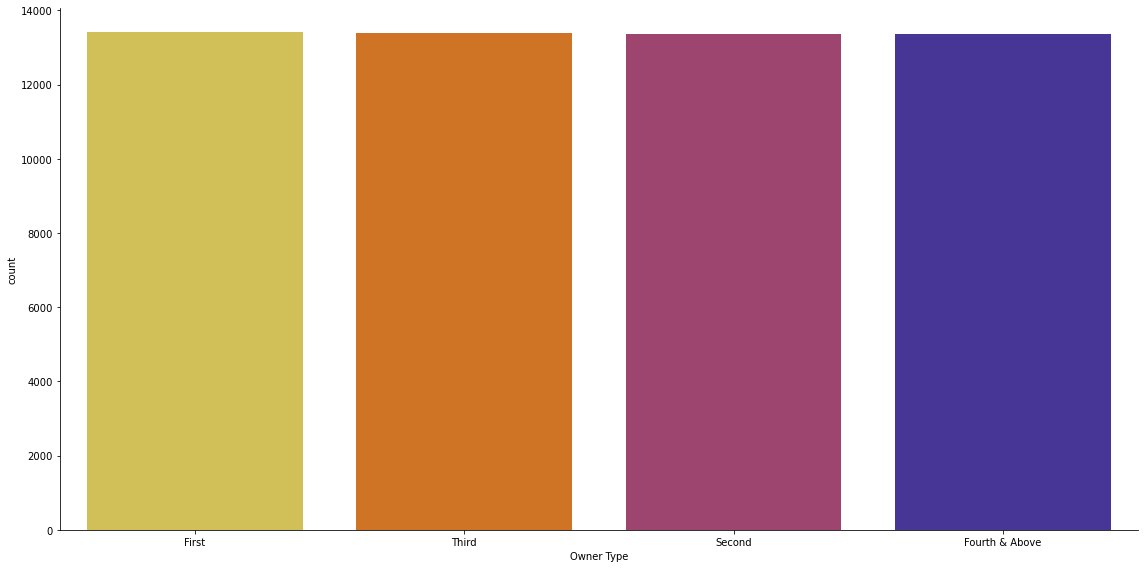

In [30]:
# Create a categorical plot of the variable count using seaborn
sns.catplot(x=var, kind="count", palette="CMRmap_r", height=8, aspect=2, data=train_set, order=train_set[var].value_counts().index, ax=ax)

# Rotate the x-tick labels by 90 degrees for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

In [31]:
#location
Location = train_set[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location

,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
53510,1,0,0
53511,1,0,0
53512,0,0,1
53513,0,0,1


In [32]:
#fuel_type

Fuel_type = train_set[[var]]
Fuel_type = pd.get_dummies(Fuel_type,drop_first=True)
Fuel_type.head()

,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [33]:
transmission = train_set[[var]]
transmission = pd.get_dummies(transmission,drop_first=True)
transmission.head()

,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [34]:
train_set.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_set.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,2,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,3,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,3,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,3,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,4,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


In [35]:
make= train_set[[var]]
make = pd.get_dummies(make,drop_first=True)
make.head()

,Owner Type
0,2
1,3
2,3
3,3
4,4


In [36]:
bt= train_set[[var]]
bt = pd.get_dummies(bt,drop_first=True)
bt.head()

,Owner Type
0,2
1,3
2,3
3,3
4,4


In [37]:
var ='door_count'
train_set[var].value_counts()
train_set[var].value_counts()

4    33808
5     7630
4     7534
2     4348
3      185
6        8
1        2
Name: door_count, dtype: int64

In [38]:
dc = train_set[[var]]
dc = pd.get_dummies(dc,drop_first=True)
dc.head()

,door_count_1,door_count_2,door_count_3,door_count_4,door_count_5,door_count_6
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [39]:
var ='seat_count'
train_set[var].value_counts()
train_set[var].value_counts()

5    38824
5     8511
4     4467
7      852
2      725
3      109
6       23
9        2
1        1
8        1
Name: seat_count, dtype: int64

In [40]:
sc = train_set[[var]]
sc = pd.get_dummies(sc,drop_first=True)
sc.head()

,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [41]:
v='model'
model = train_set[[v]]
model = pd.get_dummies(model,drop_first=True)
model.head()

,model_avensis,model_aygo,model_citigo,model_coupe,model_i30,model_juke,model_micra,model_octavia,model_panda,model_q3,...,model_qashqai,model_rapid,model_roomster,model_superb,model_tt,model_x1,model_x3,model_x5,model_yaris,model_yeti
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
final_train= pd.concat([train_set,Location,Fuel_type,transmission,make,model,bt,dc,sc],axis=1)
final_train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,...,door_count_6,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,25001,skoda,octavia,Ahmedabad,65520.0,2,1964,55,1964,147.0,...,0,0,0,0,0,0,0,0,0,0
1,25002,fiat,panda,Ahmedabad,27750.0,3,2012,7,1242,51.0,...,0,0,0,0,1,0,0,0,0,0
2,25003,bmw,x1,Hyderabad,46000.0,3,2014,5,1995,105.0,...,0,0,0,0,0,1,0,0,0,0
3,25004,nissan,juke,Mumbai,43949.0,3,2011,8,1618,140.0,...,0,0,0,0,0,1,0,0,0,0
4,25005,bmw,x5,Jaipur,59524.0,4,2012,7,2993,180.0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
final_train.drop(["Location",'Maker','model',"fuel_type","transmission","door_count","seat_count","body_type"],axis=1,inplace=True)
final_train.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,door_count_6,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,25001,65520.0,2,1964,55,1964,147.0,8,543764.25,0,...,0,0,0,0,0,0,0,0,0,0
1,25002,27750.0,3,2012,7,1242,51.0,6,401819.25,0,...,0,0,0,0,1,0,0,0,0,0
2,25003,46000.0,3,2014,5,1995,105.0,7,2392855.50,0,...,0,0,0,0,0,1,0,0,0,0
3,25004,43949.0,3,2011,8,1618,140.0,7,958606.50,0,...,0,0,0,0,0,1,0,0,0,0
4,25005,59524.0,4,2012,7,2993,180.0,7,3085561.50,1,...,0,0,0,0,0,1,0,0,0,0


In [44]:
final_train.columns

Index(['Id', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type', 'model_avensis', 'model_aygo', 'model_citigo',
       'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'Owner Type', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_count_6',
       'seat_count_1', 'seat_count_2', 'seat_count_3', 'seat_count_4',
       'seat_count_5', 'seat_count_6', 'seat_count_7', 'sea

In [45]:
test_data=pd.read_csv("Test_data_set.csv")
test_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [46]:
test_data['Distance '] = test_data['Distance '].replace(np.nan, test_data['Distance '].median())
test_data['engine_power'] = test_data['engine_power'].replace(np.nan, test_data['engine_power'].median())
test_data['body_type']=test_data['body_type'].replace(np.nan,'compact')
test_data['door_count'] = test_data['door_count'].replace('None',4)
test_data['seat_count'] = test_data['seat_count'].replace('None',5)

In [47]:
var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [48]:
var = 'fuel_type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_type_petrol
0,1
1,0
2,0
3,0
4,1


In [49]:
var = 'transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_man
0,1
1,1
2,1
3,0
4,0


In [50]:
var='seat_count'
sc = train_set[[var]]
sc = pd.get_dummies(sc,drop_first=True)
sc.head()

,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [51]:
var='door_count'
dc = train_set[[var]]
dc = pd.get_dummies(dc,drop_first=True)
dc.head()

,door_count_1,door_count_2,door_count_3,door_count_4,door_count_5,door_count_6
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [52]:
var='body_type'
bt = train_set[[var]]
bt = pd.get_dummies(bt,drop_first=True)
bt.head()

,body_type_van
0,0
1,0
2,0
3,0
4,0


In [53]:
test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,1,2007,12,1595,75.0,compact,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,3,2014,5,1598,77.0,compact,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,2,2014,5,1968,110.0,compact,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,4,2015,4,1968,110.0,compact,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,3,2015,4,1984,169.0,compact,4,auto,2,5,petrol


In [54]:
var='Maker'
make = train_set[[var]]
make = pd.get_dummies(make,drop_first=True)
make.head()

,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [55]:
v='model'
model = train_set[[v]]
model = pd.get_dummies(model,drop_first=True)
model.head()

,model_avensis,model_aygo,model_citigo,model_coupe,model_i30,model_juke,model_micra,model_octavia,model_panda,model_q3,...,model_qashqai,model_rapid,model_roomster,model_superb,model_tt,model_x1,model_x3,model_x5,model_yaris,model_yeti
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
final_test= pd.concat([test_data,Location,Fuel_type,transmission,make,model,bt,dc,sc],axis=1)
final_test.head()

final_test.drop(["Location","Maker",'model',"fuel_type","transmission","door_count","seat_count","body_type"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Final Test Size:  (53515, 69)


In [57]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             53515 non-null  float64
 5   Owner Type           53515 non-null  int64  
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         53515 non-null  float64
 10  body_type            53515 non-null  object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [59]:
X = final_train.loc[:,['Id', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type_Fourth & Above', 'Owner Type_Second', 'Owner Type_Third',
       'Owner Type', 'model_avensis', 'model_aygo', 'model_citigo',
       'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'Owner Type', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_count_6',
       'seat_count_1', 'seat_count_2', 'seat_count_3', 'seat_count_4',
       'seat_count_5', 'seat_count_6', 'seat_count_7', 'seat_count_8',
       'seat_count_9']]
X.shape

(53515, 81)

In [60]:
train_set['Price']=train_set['Price'].astype('int')
y = final_train.loc[:,['Price']]
y.head()

,Price
0,543764.25
1,401819.25
2,2392855.50
3,958606.50
4,3085561.50


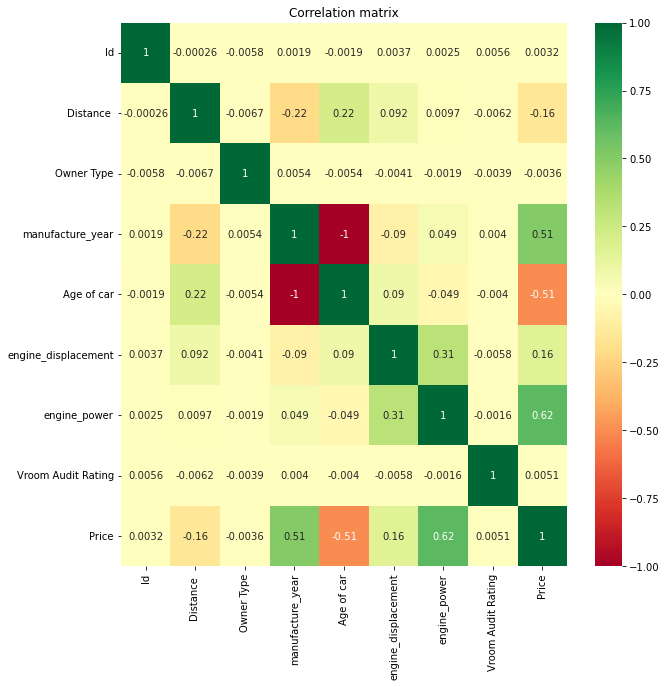

In [61]:
# Convert the columns to integer data type
train_set['engine_power'] = train_set['engine_power'].astype(int)
train_set['Distance '] = train_set['Distance '].astype(int)

# Create a correlation matrix
corr = train_set.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, annot=True, cmap='RdYlGn', ax=ax)

# Set the plot title
plt.title("Correlation matrix")

# Display the plot
plt.show()

In [62]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.007e+31
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:58:36   Log-Likelihood:             9.6344e+05
No. Observations:               53515   AIC:                        -1.927e+06
Df Residuals:                   53467   BIC:                        -1.926e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      8.371e-14   2.52e-15     33.187      0.000    7.88e-14    8.87e-14
Id                        -1.421e-14   1.03e-15    -13.813      0.000   -1.62e-14   -1.22e-14
Distance                   -3.73e-16   6.08e-17     -6.130      0.000   -4.92e-16   -2.54e-16
Owner Type                 6.821e-13   1.66e-12      0.410      0.682   -2.58e-12    3.94e-12
Owner Type                         0   1.66e-12          0      1.000   -3.26e-12    3.26e-12
Owner Type                -7.958e-13   1.66e-12     -0.478      0.633   -4.06e-12    2.47e-12
manufacture_year           1.137e-12   7.79e-14     14.587      0.000    9.84e-13    1.29e-12
Age of car                 1.532e-10   5.12e-12     29.948      0.000    1.43e-10    1.63e-10
engine_displacement       -7.239e-14   1.17e-14     -6.192      0.000   -9.53e-14   -4.95e-14
engine_power              -5.542e-12   6.54e-13     -8.470      0.000   -6.82e-12   -4.26e-12
Vroom Audit Rating         1.046e-11   1.12e-11      0.933      0.351   -1.15e-11    3.24e-11
Price                         1.0000   3.56e-17   2.81e+16      0.000       1.000       1.000
Owner Type_Fourth & Above  1.114e-11   2.23e-12      4.987      0.000    6.76e-12    1.55e-11
Owner Type_Fourth & Above  1.285e-11   2.23e-12      5.750      0.000    8.47e-12    1.72e-11
Owner Type_Fourth & Above   1.16e-11   2.23e-12      5.190      0.000    7.22e-12     1.6e-11
Owner Type_Second         -2.092e-11   4.01e-12     -5.216      0.000   -2.88e-11   -1.31e-11
Owner Type_Second         -2.592e-11   4.01e-12     -6.463      0.000   -3.38e-11   -1.81e-11
Owner Type_Second         -2.802e-11   4.01e-12     -6.988      0.000   -3.59e-11   -2.02e-11
Owner Type_Third          -4.206e-12   3.07e-12     -1.370      0.171   -1.02e-11    1.81e-12
Owner Type_Third          -4.093e-12   3.07e-12     -1.333      0.182   -1.01e-11    1.92e-12
Owner Type_Third          -4.661e-12   3.07e-12     -1.518      0.129   -1.07e-11    1.36e-12
Owner Type_Fourth & Above   1.29e-11   2.23e-12      5.776      0.000    8.52e-12    1.73e-11
Owner Type_Fourth & Above  9.834e-12   2.23e-12      4.402      0.000    5.45e-12    1.42e-11
Owner Type_Fourth & Above   1.16e-11   2.23e-12      5.190      0.000    7.22e-12     1.6e-11
Owner Type_Second         -2.177e-11   4.01e-12     -5.428      0.000   -2.96e-11   -1.39e-11
Owner Type_Second         -2.376e-11   4.01e-12     -5.925      0.000   -3.16e-11   -1.59e-11
Owner Type_Second         -2.245e-11   4.01e-12     -5.599      0.000   -3.03e-11   -1.46e-11
Owner Type_Third          -5.343e-12   3.07e-12     -1.741      0.082   -1.14e-11    6.73e-13
Owner Type_Third          -2.842e-12   3.07e-12     -0.926      0.355   -8.86e-12    3.17e-12
Owner Type_Third          -7.617e-12   3.07e-12     -2.481      0.013   -1.

In [63]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=3320014.72034444, pvalue=0.0)


<AxesSubplot:ylabel='Density'>

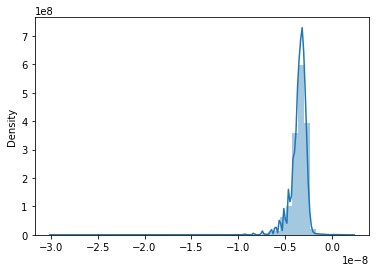

In [64]:
import seaborn as sns

sns.distplot(lin_reg.resid)

In [65]:
sns.set(style = 'whitegrid')

final_train['predictions'] = lin_reg.predict(X_constant)
residuals = lin_reg.resid
residuals  #PREDICTED OR FITTED VALUES.

0       -1.001172e-08
1       -3.026798e-09
2       -5.122274e-09
3       -3.608875e-09
4       -5.587935e-09
             ...     
53510   -3.026798e-09
53511   -2.619345e-09
53512   -3.725290e-09
53513   -1.629815e-09
53514   -3.492460e-09
Length: 53515, dtype: float64

In [66]:
## for sqrt(X)
df2 = final_train.copy()
final_df = final_train.transform(lambda x: x**0.5)
final_df.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,158.117045,255.968748,1.414214,44.317040,7.416198,44.317040,12.124356,2.828427,737.403723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737.403723
1,158.120207,166.583312,1.732051,44.855323,2.645751,35.242020,7.141428,2.449490,633.892144,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,633.892144
2,158.123370,214.476106,1.732051,44.877611,2.236068,44.665423,10.246951,2.645751,1546.885742,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1546.885742
3,158.126532,209.640168,1.732051,44.844175,2.828427,40.224371,11.832160,2.645751,979.084521,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,979.084521
4,158.129694,243.975409,2.000000,44.855323,2.645751,54.708317,13.416408,2.645751,1756.576642,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1756.576642


In [67]:
X = final_df.drop('Price',axis=1)
y = final_df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.479e+29
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:04   Log-Likelihood:             1.2396e+06
No. Observations:               53515   AIC:                        -2.479e+06
Df Residuals:                   53466   BIC:                        -2.479e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -1.15e-09   2.44e-10     -4.721      0.000   -1.63e-09   -6.72e-10
Id                                 0   2.62e-15          0      1.000   -5.14e-15    5.14e-15
Distance                   4.613e-15   7.83e-16      5.891      0.000    3.08e-15    6.15e-15
Owner Type                -4.247e-10   8.99e-11     -4.722      0.000   -6.01e-10   -2.48e-10
manufacture_year           5.363e-11   1.14e-11      4.707      0.000    3.13e-11     7.6e-11
Age of car                 4.466e-12   9.23e-13      4.840      0.000    2.66e-12    6.27e-12
engine_displacement        1.507e-14   1.21e-14      1.245      0.213   -8.66e-15    3.88e-14
engine_power              -3.553e-13   8.64e-14     -4.110      0.000   -5.25e-13   -1.86e-13
Vroom Audit Rating        -1.892e-13   3.11e-13     -0.609      0.543   -7.98e-13     4.2e-13
Owner Type_Fourth & Above  4.243e-10   8.99e-11      4.717      0.000    2.48e-10    6.01e-10
Owner Type_Second          1.775e-10   3.73e-11      4.763      0.000    1.04e-10     2.5e-10
Owner Type_Third           3.156e-10   6.58e-11      4.793      0.000    1.87e-10    4.45e-10
Owner Type_Fourth & Above  4.284e-10   8.99e-11      4.763      0.000    2.52e-10    6.05e-10
Owner Type_Second          1.805e-10   3.73e-11      4.846      0.000    1.08e-10    2.54e-10
Owner Type_Third            3.12e-10   6.58e-11      4.738      0.000    1.83e-10    4.41e-10
Owner Type_Fourth & Above  4.302e-10   8.99e-11      4.783      0.000    2.54e-10    6.06e-10
Owner Type_Second          1.768e-10   3.73e-11      4.745      0.000    1.04e-10     2.5e-10
Owner Type_Third           3.151e-10   6.58e-11      4.786      0.000    1.86e-10    4.44e-10
Owner Type                -4.416e-10   8.99e-11     -4.909      0.000   -6.18e-10   -2.65e-10
model_avensis             -6.093e-13   7.66e-13     -0.795      0.426   -2.11e-12    8.92e-13
model_aygo                 1.901e-12   8.91e-13      2.133      0.033    1.54e-13    3.65e-12
model_citigo               2.494e-12      1e-12      2.488      0.013    5.29e-13    4.46e-12
model_coupe                2.895e-13   1.01e-12      0.287      0.774   -1.69e-12    2.27e-12
model_i30                  8.784e-13      7e-13      1.255      0.209   -4.93e-13    2.25e-12
model_juke                 6.644e-13   8.59e-13      0.774      0.439   -1.02e-12    2.35e-12
model_micra                5.311e-13   7.78e-13      0.683      0.495   -9.93e-13    2.06e-12
model_octavia              -4.05e-13    5.7e-13     -0.711      0.477   -1.52e-12    7.12e-13
model_panda                9.805e-13   8.36e-13      1.173      0.241   -6.57e-13    2.62e-12
model_q3                  -2.659e-12   7.69e-13     -3.458      0.001   -4.17e-12   -1.15e-12
model_q5                   -3.24e-12    7.9e-13     -4.101      0.000   -4.

In [68]:
df2 = final_train.copy()
final_df = df2.transform(lambda X: np.log(X))
final_df.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,10.126671,11.090111,0.693147,7.582738,4.007333,7.582738,4.990433,2.079442,13.206271,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,13.206271
1,10.126711,10.230991,1.098612,7.606885,1.945910,7.124478,3.931826,1.791759,12.903758,-inf,...,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,12.903758


In [69]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,0.00004,0.000015,0.500000,0.000509,0.018182,0.000509,0.006803,0.125000,0.000002,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.000002
1,0.00004,0.000036,0.333333,0.000497,0.142857,0.000805,0.019608,0.166667,0.000002,inf,...,inf,inf,inf,1.0,inf,inf,inf,inf,inf,0.000002


In [70]:
df_final2 = df2.transform(lambda X: np.exp(X))
df_final2.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,inf,inf,7.389056,inf,7.694785e+23,inf,6.938871e+63,2980.957987,inf,1.0,...,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,inf
1,inf,inf,20.085537,inf,1.096633e+03,inf,1.409349e+22,403.428793,inf,1.0,...,1.0,1.0,1.0,2.71875,1.0,1.0,1.0,1.0,1.0,inf


In [71]:
final_train['Price1']=np.log(final_train['Price'])

In [72]:
final_train.drop('Price1',axis=1,inplace=True)
final_train.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Owner Type_Fourth & Above,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,25001,65520.0,2,1964,55,1964,147.0,8,543764.25,0,...,0,0,0,0,0,0,0,0,0,543764.25
1,25002,27750.0,3,2012,7,1242,51.0,6,401819.25,0,...,0,0,0,1,0,0,0,0,0,401819.25


In [73]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(4.432813604857738, 0.0)

In [74]:
lin_reg.resid.mean()

-3.570862542552986e-09

[('F statistic', 1.0091830659095025), ('p-value', 0.2275364625703042)]

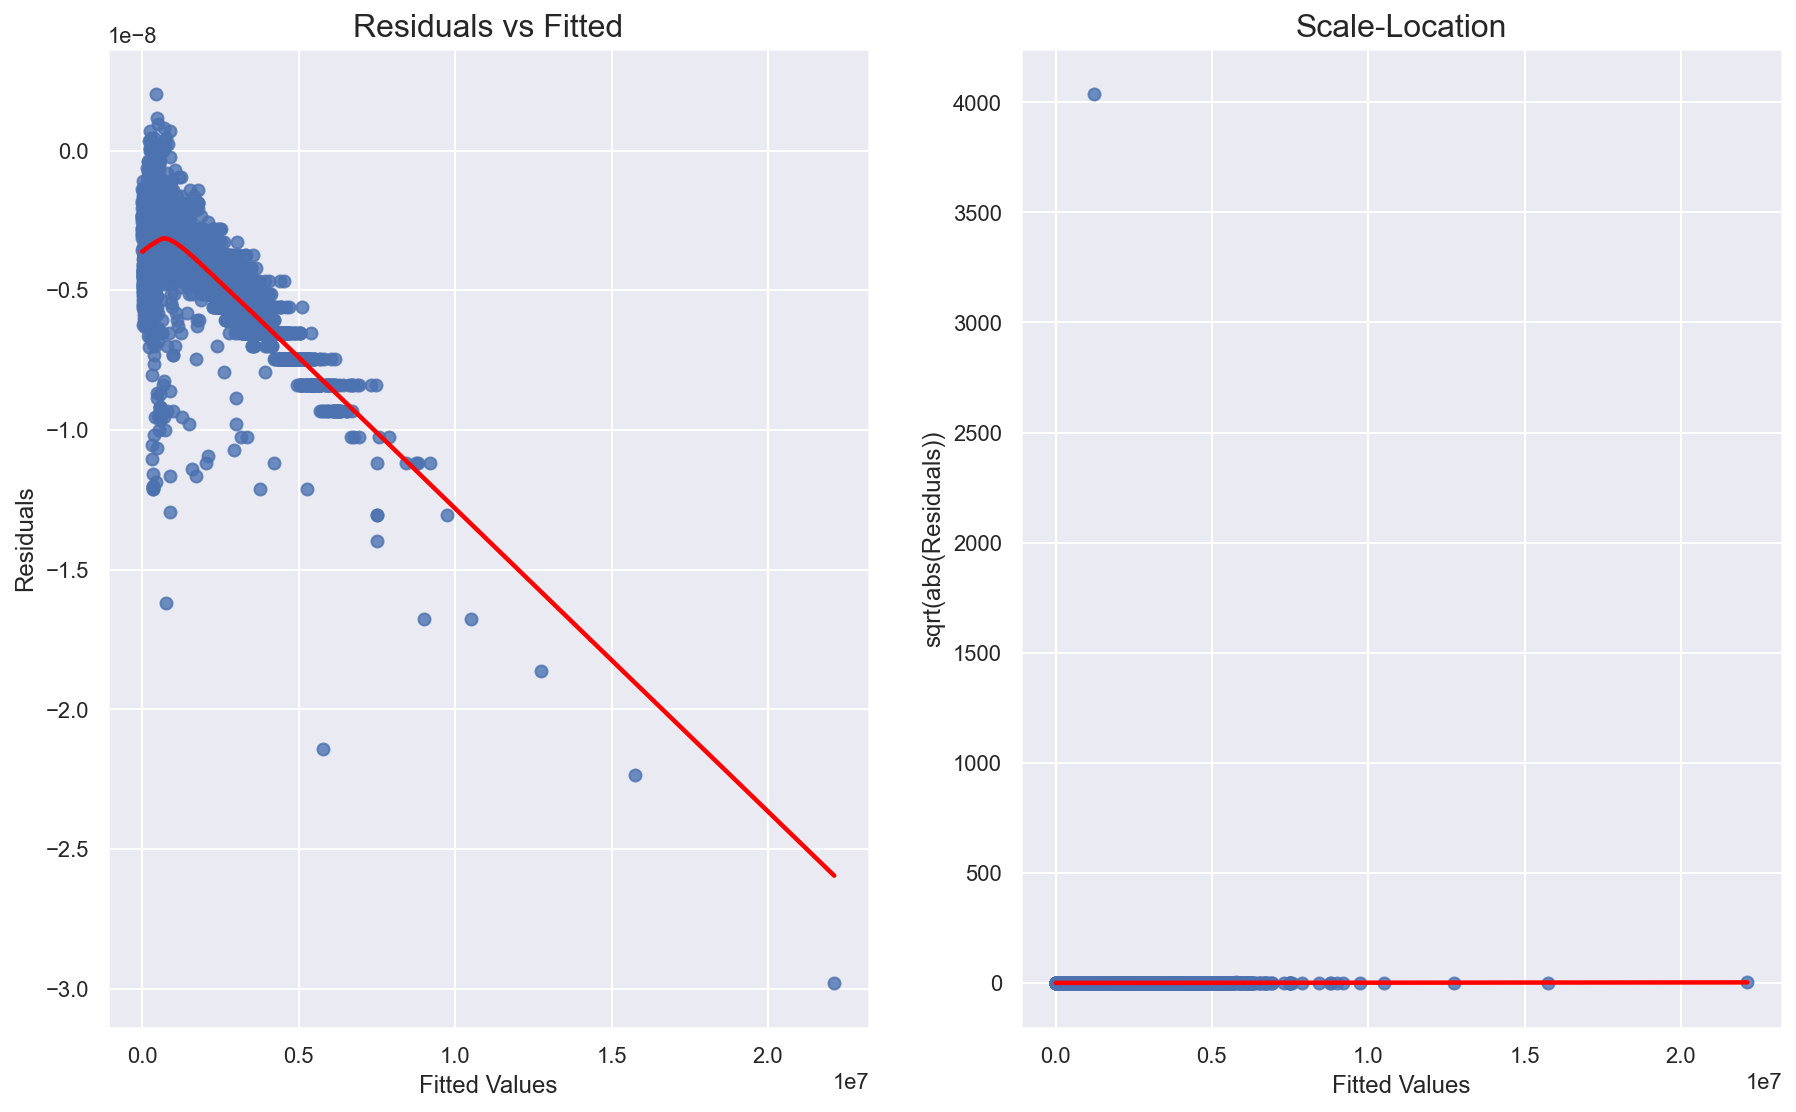

In [75]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Owner Type_Fourth & Above,Owner Type_Second,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
vif,1.00096,2.373172,inf,42.095937,54.782957,1.694244,3.948695,1.000807,inf,inf,...,1.00353,1.798382,1.151415,3.552519,2.7489,1.035558,1.449087,1.000917,1.001361,7.959121


In [81]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                        2.356983e-06
Id                           1.000000e+00
Distance                     3.873105e-09
Owner Type                   2.340240e-06
manufacture_year             2.524231e-06
Age of car                   1.304775e-06
engine_displacement          2.131782e-01
engine_power                 3.956679e-05
Vroom Audit Rating           5.427826e-01
Owner Type_Fourth & Above    2.399108e-06
Owner Type_Second            1.909745e-06
Owner Type_Third             1.647554e-06
Owner Type_Fourth & Above    1.916751e-06
Owner Type_Second            1.265420e-06
Owner Type_Third             2.166710e-06
Owner Type_Fourth & Above    1.733650e-06
Owner Type_Second            2.090787e-06
Owner Type_Third             1.705217e-06
Owner Type                   9.173914e-07
model_avensis                4.264050e-01
model_aygo                   3.291036e-02
model_citigo                 1.286742e-02
model_coupe                  7.739099e-01
model_i30                    2.094

In [84]:
train_set['Price']=train_set['Price'].astype('int')
y = final_train.loc[:,['Price']]
y.head()


,Price
0,543764.25
1,401819.25
2,2392855.50
3,958606.50
4,3085561.50


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 25)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9583717555277521
Accuracy on Testing set:  0.9625246877782613


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred1= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred1)))

Accuracy on Traing set:  0.9995103484837957
Accuracy on Testing set:  0.9997683273279563
R squared: 0.9997683273279563


In [98]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred2= dt_reg.predict(X_test)
print("Accuracy on Traing set: ",dt_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",dt_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred2)))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.999798804310686
R squared: 0.999798804310686


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = DecisionTreeRegressor()
gb_reg.fit(X_train, y_train)
y_pred3= gb_reg.predict(X_test)
print("Accuracy on Traing set: ",gb_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",gb_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred3)))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.9999015067388503
R squared: 0.9999015067388503


In [102]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred3))

		Error Table
Mean Absolute Error      :  289.40063533588716
Mean Squared  Error      :  68344529.35286835
Root Mean Squared  Error :  8267.07501797754
R Squared                :  0.9999015067388503


In [115]:
sv_to_csv = train_set[['Id', 'Price']]

csvfile=open('file.csv','w', newline='')
obj=csv.writer(csvfile)